In [38]:
# activate gohsnap_py
# activate bgc_matchups
#%run ../gohsnap-py/gohsnap_access 
#%run ../bgcargo_floatmatchups/getfloats_gohsnap

import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os
import glob
from pyrsktools import RSK
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib.dates as mdates
import matplotlib.colors as colors
import gsw
import json
import numpy as np
from numpy.polynomial.polynomial import polyval
import xarray as xr
from scipy import signal

import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
tmp = xr.open_dataset(r'C:\Users\bikbe\Documents\Projects\GOHSNAP\Data\Respiration\SIMPLE_TRIM_output.nc')

#calculate depth coordinate
depths = []
for i in np.arange(len(tmp.DEPTH)):
    depths.append(tmp.DEPTH.sel(depth = i).median().values)

np.round(depths)


array([  18.,   55.,   94.,  137.,  187.,  247.,  317.,  401.,  501.,
        619.,  758.,  919., 1104., 1317., 1559., 1833., 2141., 2485.,
       2867., 3290., 3756., 4267., 4825., 5433.])

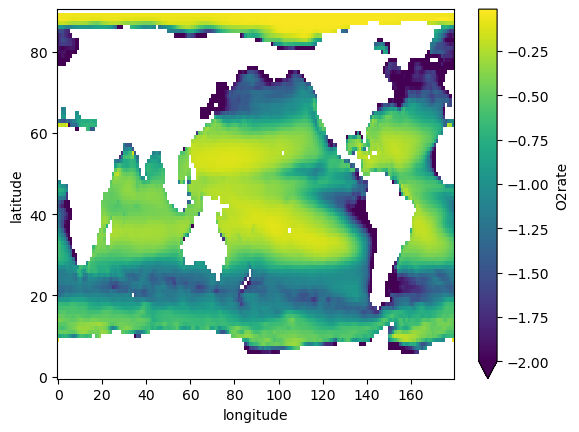

In [4]:
tmp.O2rate.sel(version = 1).sel(depth = 10).transpose().plot(vmin = -2)


# Sum up North Atlantic respiration within LSW layer 

Net respiration in the North Atlantic:
-2.4160190030701303


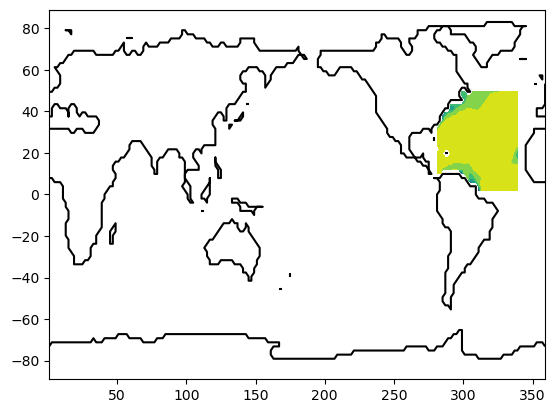

In [104]:
#geographical box for North Atlantic
lat_min = 0#14
lat_max = 50
lon_min = 280
lon_max = 340

# Temperature definition of LSW
# Switch to temp_min = 1 and temp_max = 6 to account for loss of oxygen due to mixing
temp_min = 3 
temp_max = 4 

plt.figure()
plt.contour(tmp.LON.sel(depth = 0), tmp.LAT.sel(depth = 0), tmp.mask.sel(depth = 0),[0], colors='k') #Coastline

#Plot oxygen on depth layer 1 to illustrative the geographical definition of North Atlantic
plt.contourf(tmp.LON.sel(depth = 0), tmp.LAT.sel(depth = 0), tmp.O2rate.mean(dim = 'version').where(tmp.mask == 1).where(tmp.LON > lon_min).where(tmp.LON < lon_max).where(tmp.LAT < lat_max).where(tmp.LAT > lat_min).sel(depth = 1))



#Calculate oxygen respiration rate in mmol/m3/year average across model versions, apply land mask, apply LSW temperature definition, apply lat/lon limits,
mmol_m3_yr = tmp.O2rate.mean(dim = 'version').where(tmp.mask == 1).where(tmp.Temp >temp_min).where(tmp.Temp <temp_max).where(tmp.LON > 280).where(tmp.LON < 340).where(tmp.LAT < lat_max).where(tmp.LAT > lat_min)

# Calculate ocean volume
m3 = tmp.Volume.where(tmp.mask == 1).where(tmp.Temp >temp_min).where(tmp.Temp <temp_max).where(tmp.LON > 280).where(tmp.LON < 340).where(tmp.LAT < lat_max).where(tmp.LAT > lat_min)

# Calculate oxygen respiration rate in Tmol/yr
tmol_yr = (mmol_m3_yr * m3)/1e15
print('Net respiration in the North Atlantic:')
print(tmol_yr.sum().values) #sum across geographical area and all depth layers

# Sum up eastern subpolr North Atlantic respiration within LSW layer 

Net respiration in the eastern subpolar North Atlantic:
-6.5645102857645785


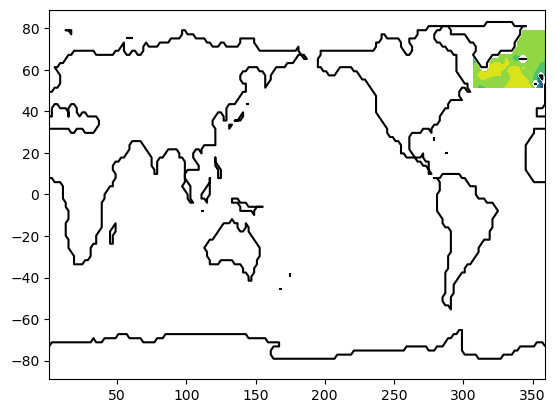

In [105]:
#original


#geographical box for eastern subpolar North Atlantic (excludes Lab Sea)
lat_min = 50#14
lat_max = 80
lon_min = 305


# Temperature definition of LSW
# Switch to temp_min = 1 and temp_max = 6 to account for loss of oxygen due to mixing
temp_min = 3 
temp_max = 4 




plt.figure()
plt.contour(tmp.LON.sel(depth = 0), tmp.LAT.sel(depth = 0), tmp.mask.sel(depth = 0),[0], colors='k') #coastline

#Plot oxygen on depth layer 1 to illustrate the geographical definition of eastern subpolar North Atlantic
plt.contourf(tmp.LON.sel(depth = 0), tmp.LAT.sel(depth = 0), tmp.O2rate.mean(dim = 'version').where(tmp.mask == 1).where(tmp.LON > lon_min).where(tmp.LAT < lat_max).where(tmp.LAT > lat_min).sel(depth = 1))


#Calculate oxygen respiration rate in mmol/m3/year average across model versions, apply land mask, apply LSW temperature definition, apply lat/lon limits,
mmol_m3_yr = tmp.O2rate.mean(dim = 'version').where(tmp.mask == 1).where(tmp.Temp >temp_min).where(tmp.Temp <temp_max).where(tmp.LON > lon_min).where(tmp.LAT < lat_max).where(tmp.LAT > lat_min)

# Calculate ocean volume
m3 = tmp.Volume.where(tmp.mask == 1).where(tmp.Temp >temp_min).where(tmp.Temp <temp_max).where(tmp.LON > lon_min).where(tmp.LAT < lat_max).where(tmp.LAT > lat_min)

# Calculate oxygen respiration rate in Tmol/yr
tmol_yr = (mmol_m3_yr * m3)/1e15
print('Net respiration in the eastern subpolar North Atlantic:')
print(tmol_yr.sum().values) #sum across geographical area and all depth layers

# Look at respiration at each depth layer of the model

C:\Users\bikbe\AppData\Local\Temp\ipykernel_33220\1011308670.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


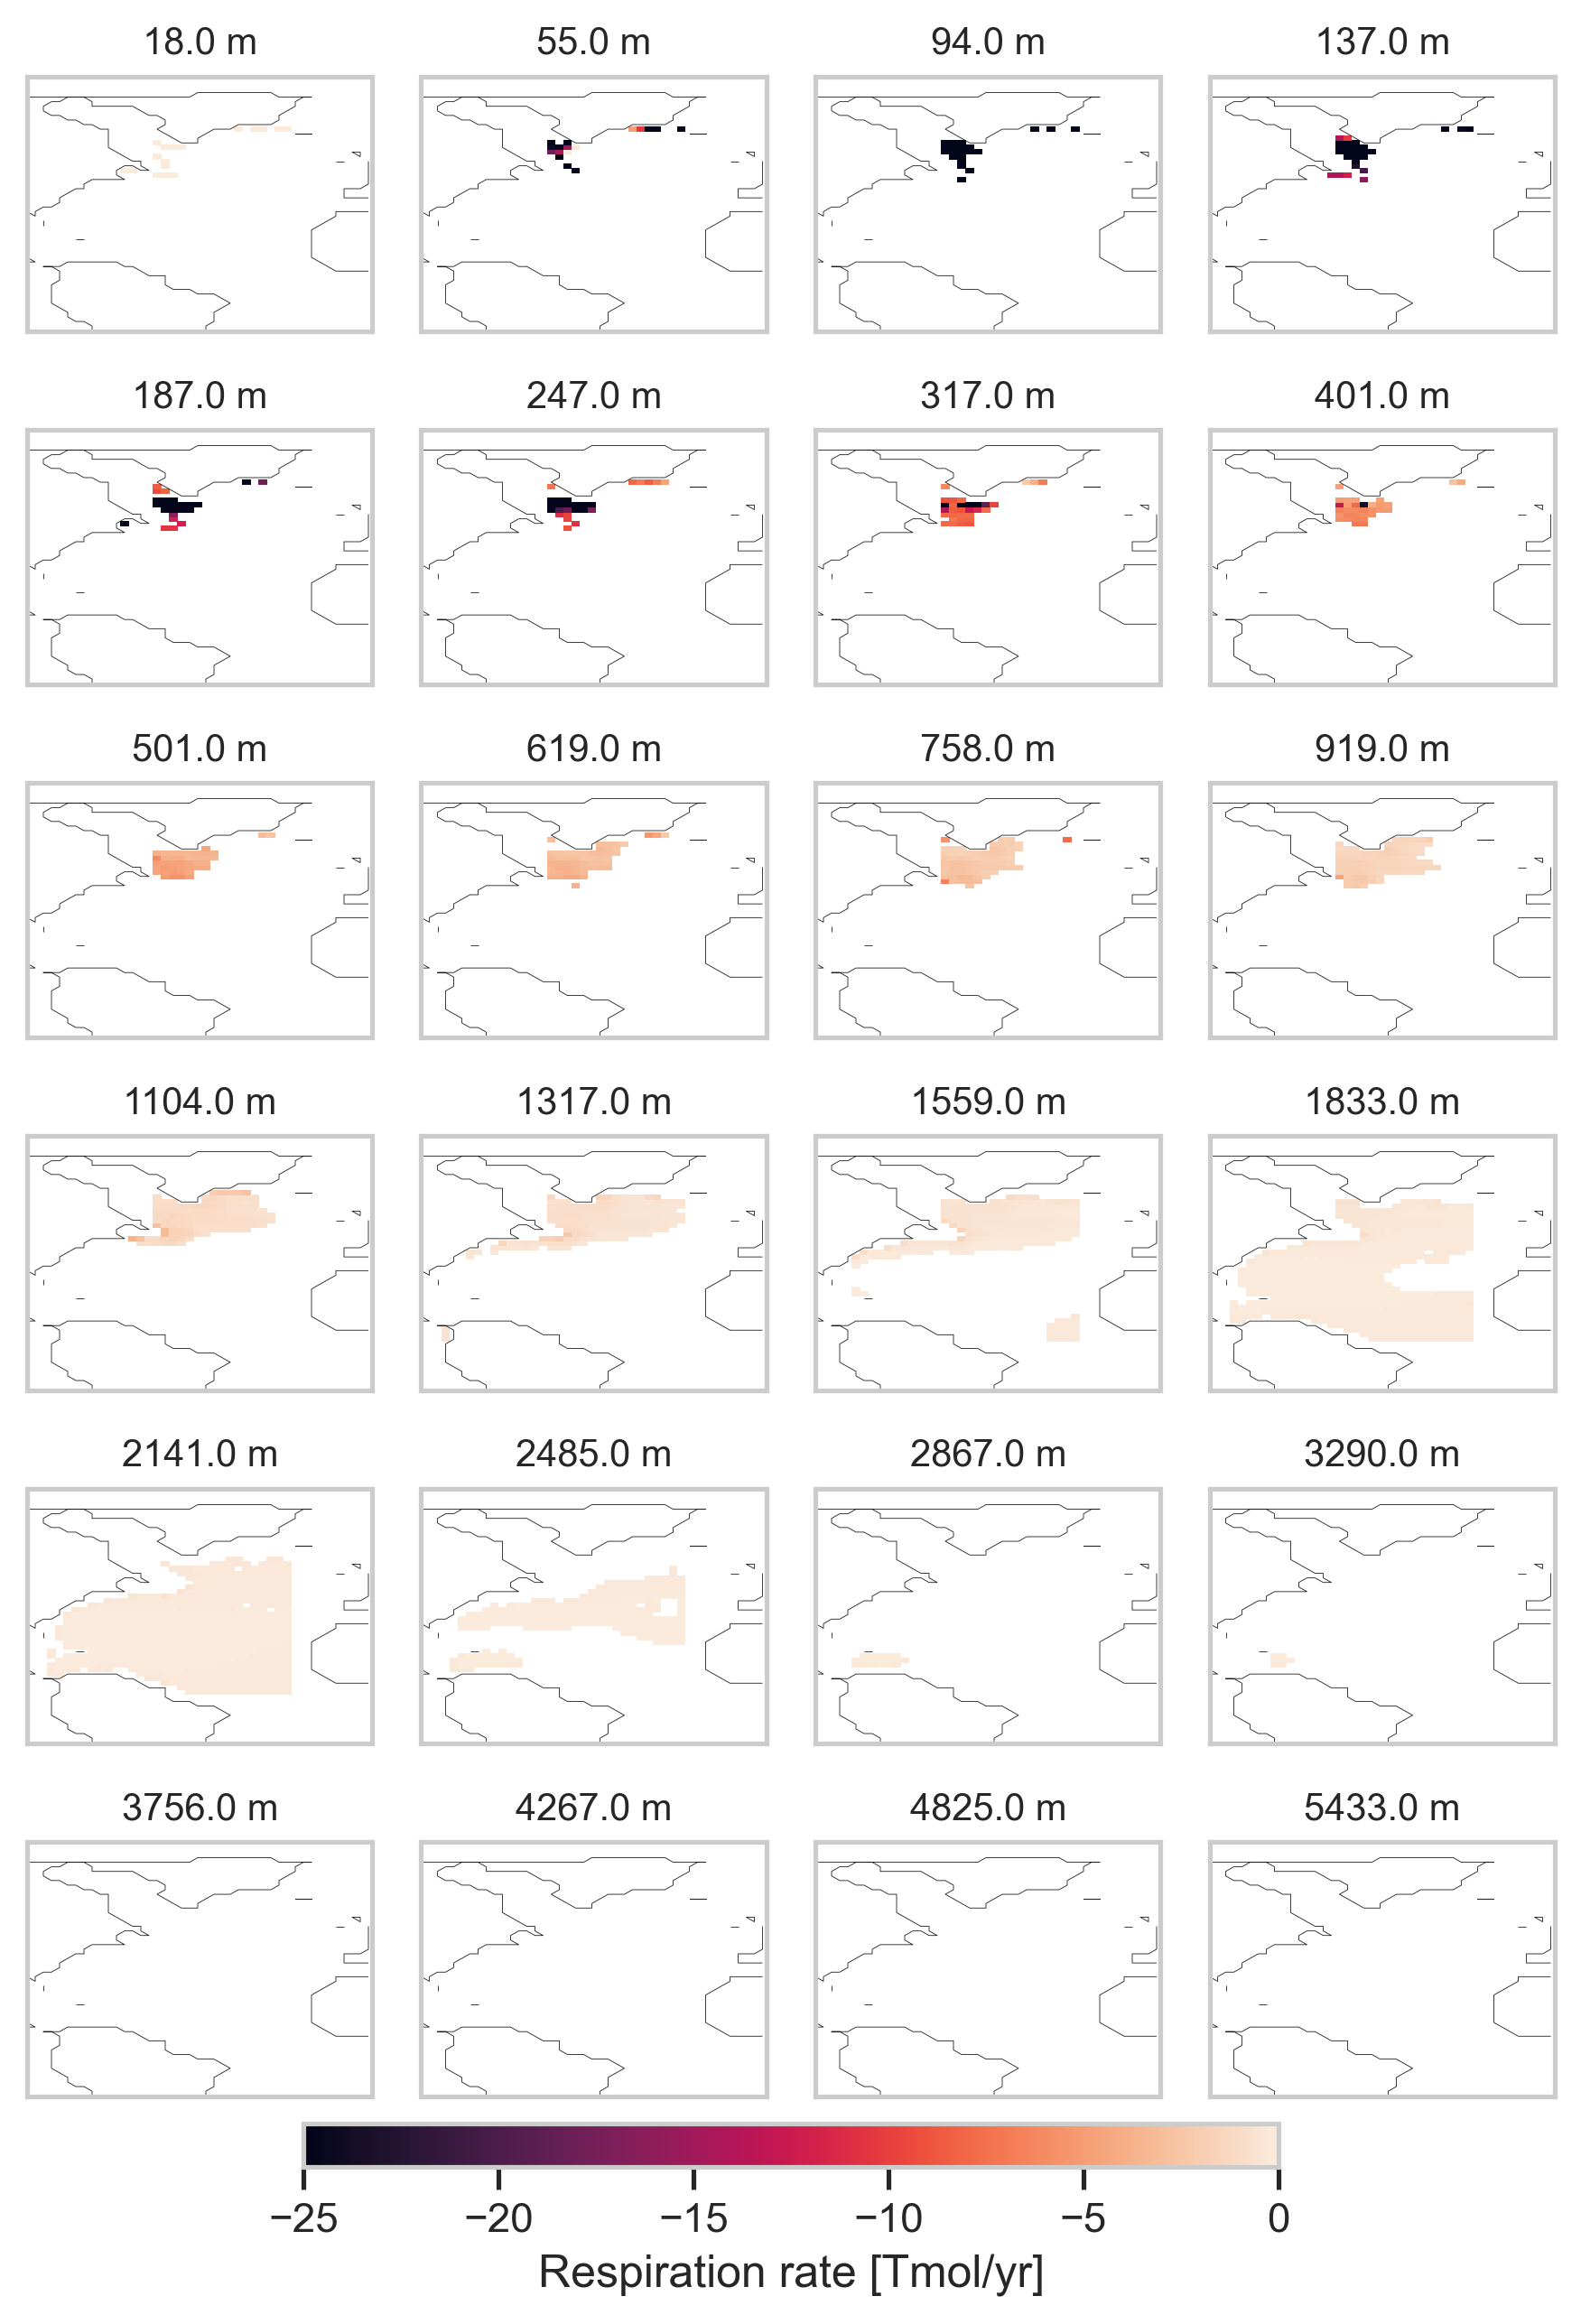

In [42]:
counter = 1
fig = plt.figure(figsize = ((6,8)), dpi = 300)

ax = None


for i in tmp.depth: #250

    plt.subplot(6,4,counter)

    # North Atlantic below 50 N
    lat_min = 0#14
    lat_max = 50
    lon_min = 280
    lon_max = 340

    temp_min = 3 
    temp_max = 4 

    plt.contour(tmp.LON.sel(depth = 0), tmp.LAT.sel(depth = 0), tmp.mask.sel(depth = 0),[0], colors='k', linewidths = 0.2)
    ax = plt.pcolor(tmp.LON.sel(depth = 0), tmp.LAT.sel(depth = 0), tmp.O2rate.mean(dim = 'version').where(tmp.mask == 1).where(tmp.Temp >temp_min).where(tmp.Temp <temp_max).where(tmp.LON > lon_min).where(tmp.LON < lon_max).where(tmp.LAT < lat_max).where(tmp.LAT > lat_min).sel(depth = i), vmin = -25, vmax = 0)


    # Eastern subpolar North Atlantic    
    lat_min = 50
    lat_max = 80
    lon_min = 305

    
    plt.pcolor(tmp.LON.sel(depth = 0), tmp.LAT.sel(depth = 0), tmp.O2rate.mean(dim = 'version').where(tmp.mask == 1).where(tmp.Temp >temp_min).where(tmp.Temp <temp_max).where(tmp.LON > lon_min).where(tmp.LON < lon_max).where(tmp.LAT < lat_max).where(tmp.LAT > lat_min).sel(depth = i), vmin = -25, vmax = 0)

    
    #plt.colorbar()
    plt.title(str(np.round(tmp.DEPTH.sel(depth = i).median().values,0)) + ' m', fontsize = 10)

    counter = counter + 1

    plt.gca().set_yticklabels([])
    plt.gca().set_xticklabels([])

    plt.xlim([275,360])
    plt.ylim([-20,90])

    plt.grid(False)

cbar_ax = fig.add_axes([0.2, -0.01, 0.6, 0.02])  # [left, bottom, width, height]
fig.colorbar(ax, cax=cbar_ax, orientation='horizontal', label='Respiration rate [Tmol/yr]')

plt.tight_layout()

plt.savefig(r'C:\Users\bikbe\Documents\Projects\GOHSNAP\Figures\Transport manuscript\respiration.png', bbox_inches='tight')